# **Tarea S801 - Visualitzacions en Python**

Aquesta pràctica permetrà explorar com es poden utilitzar eines de visualització avançades en Python per a interpretar i presentar dades de manera efectiva, proporcionant una oportunitat valuosa per a millorar les habilitats analítiques i tècniques.

### **Nivel 1**

Realitza la connexió en Python amb el MySQL Workbench per a carregar tota la informació que tens en les taules.

Realitzaràs una visualització per a cada exercici. Comenta el que et crida l'atenció de graficar aquesta variable, justifica l'elecció del gràfic i interpreta els resultats en funció de les teves dades.

In [48]:
"""1º Importo las librerías que creo que puedo necesitar en esta tarea."""

import mysql.connector
from mysql.connector import Error
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px
import plotly.graph_objects as go
import squarify
import datetime as dt

In [49]:
try:
    connection = mysql.connector.connect(host='localhost',
                                         database= 'new_transactions',
                                         user= 'root',
                                         password='Gregorio@00')
    if connection.is_connected():
        db_Info = connection.get_server_info()
        print("Connected to MySQL Server version ", db_Info)
        cursor = connection.cursor()
        cursor.execute("select database();")
        record = cursor.fetchone()
        print("You're connected to database: ", record)

except Error as e:
    print("Error while connecting to MySQL", e)
finally:
    if connection.is_connected():
        cursor.close()
        connection.close()
        print("MySQL connection is closed")

"""Conexión a SQL sin errores"""

Connected to MySQL Server version  8.0.39
You're connected to database:  ('new_transactions',)
MySQL connection is closed


'Conexión a SQL sin errores'

In [50]:
"""Para guardar todos las tablas en un dataframe, puedo crear un diccionario.
dataframe = {}
Con un bucle for puedo recorrer las tablas con una query e ir guardándolas:
query = "SELECT * FROM {tabla}
Ver cómo se guardan las tablas, si están numeradas las puedo recorrer sin problemas."""

import mysql.connector
import pandas as pd

conexion = mysql.connector.connect(host='localhost',
                               database='new_transactions',
                               user='root',
                               password='Gregorio@00')

# Guardar tablas en un diccionario
cursor = conexion.cursor()
cursor.execute("SHOW TABLES;")
tables= cursor.fetchall()
print(tables)               # Para ver cómo están guardadas las tablas --> están guardadas como tuplas, elem[0] de cada tupla es una tabla

dict_transactions = {}      # defino el diccionario donde guardaré las tablas

for elem in tables:         # recorro cada tabla y la voy añadiendo al diccionario --> diccionario anidado
    query = "SELECT * FROM " + elem[0]
    dict_transactions[elem[0]] = pd.read_sql(query, conexion)

[('card_status',), ('companies',), ('credit_cards',), ('data_users',), ('products',), ('trans_prod',), ('transactions',)]


C:\Users\maria\AppData\Local\Temp\ipykernel_18224\580628673.py:25: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



In [51]:
""" for key, df in dict_transactions.items():
	print(f"Info for {key}:")
	print(df.info())
	print("\n") """

' for key, df in dict_transactions.items():\n\tprint(f"Info for {key}:")\n\tprint(df.info())\n\tprint("\n") '

In [52]:
# Compruebo las claves de mi diccionario principal
dict_transactions.keys()

dict_keys(['card_status', 'companies', 'credit_cards', 'data_users', 'products', 'trans_prod', 'transactions'])

In [53]:
type(dict_transactions['transactions']['timestamp'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [54]:
# Creo columna year
dict_transactions['transactions']['year'] = dict_transactions['transactions']['timestamp'].apply(lambda x: x.year)

# Columna month
dict_transactions['transactions']['month'] = dict_transactions['transactions']['timestamp'].apply(lambda x: x.month)

# Columna day
dict_transactions['transactions']['day'] = dict_transactions['transactions']['timestamp'].apply(lambda x: x.day)

dict_transactions['transactions'].head(10)

,transaction_id,credit_card_id,company_id,timestamp,amount,declined,product_list,user_id,lat,longitude,year,month,day
0,02C6201E-D90A-1859-B4EE-88D2986D3B02,CcU-2938,b-2362,2021-08-28 23:42:24,466.92,0,"71, 1, 19",92,81.9185,-12.5276,2021,8,28
1,0466A42E-47CF-8D24-FD01-C0B689713128,CcU-4219,b-2302,2021-07-26 07:29:18,49.53,0,"47, 97, 43",170,-43.9695,-117.5250,2021,7,26
2,063FBA79-99EC-66FB-29F7-25726D1764A5,CcU-2987,b-2250,2022-01-06 21:25:27,92.61,0,"47, 67, 31, 5",275,-81.2227,-129.0500,2022,1,6
3,0668296C-CDB9-A883-76BC-2E4C44F8C8AE,CcU-3743,b-2618,2022-01-26 02:07:14,394.18,0,"89, 83, 79",265,-34.3593,-100.5560,2022,1,26
4,06CD9AA5-9B42-D684-DDDD-A5E394FEBA99,CcU-2959,b-2346,2021-10-26 23:00:01,279.93,0,"43, 31",92,33.7381,158.2980,2021,10,26
5,07A46D48-31A3-7E87-65B9-0DA902AD109F,CcU-3225,b-2386,2021-06-28 21:11:42,340.87,1,"47, 23",272,38.8342,92.1905,2021,6,28
6,09DE92CE-6F27-2BB7-13B5-9385B2B3B8E2,CcU-3071,b-2298,2021-05-11 20:40:06,303.05,1,"67, 7",275,71.1706,10.5757,2021,5,11
7,0A476ED9-0C13-1962-F87B-D3563924B539,CcU-4359,b-2302,2022-02-26 20:33:54,430.49,0,"29, 41, 11",221,-56.4901,114.8010,2022,2,26
8,0BEB80B7-9D66-1707-CE4B-9DC7E71914B5,CcU-3141,b-2338,2022-03-04 14:54:35,288.81,1,"19, 41, 29, 3",272,23.3264,-13.6037,2022,3,4
9,0C7C3A33-9947-3BC1-846D-7BE3D0D17598,CcU-3309,b-2434,2021-04-10 20:58:41,103.44,1,"89, 31",272,63.3615,-68.6667,2021,4,10


#### **Ejercicio 1**

Una variable numèrica.

In [68]:
"""Voy a representar las compras mensuales aceptadas"""

# Solo transacciones aceptadas y hacer una copia explícita para evitar el warning
accepted_transactions = dict_transactions['transactions'].loc[dict_transactions['transactions']['declined'] == 0].copy()
accepted_transactions = dict_transactions['transactions'].query("declined == 0").copy()

# Creo columna year_month
accepted_transactions['year_month'] = accepted_transactions['timestamp'].dt.to_period('M')

# Agrupar por mes y sumar las cantidades
monthly_total_accepted_transactions = round(accepted_transactions.groupby(["year_month"], as_index=False)["amount"].sum(), 2)

monthly_total_accepted_transactions

,year_month,amount
0,2021-03,5711.35
1,2021-04,13507.68
2,2021-05,11659.27
3,2021-06,10817.81
4,2021-07,9931.77
5,2021-08,13900.24
6,2021-09,9524.43
7,2021-10,10765.57
8,2021-11,7675.74
9,2021-12,14177.16


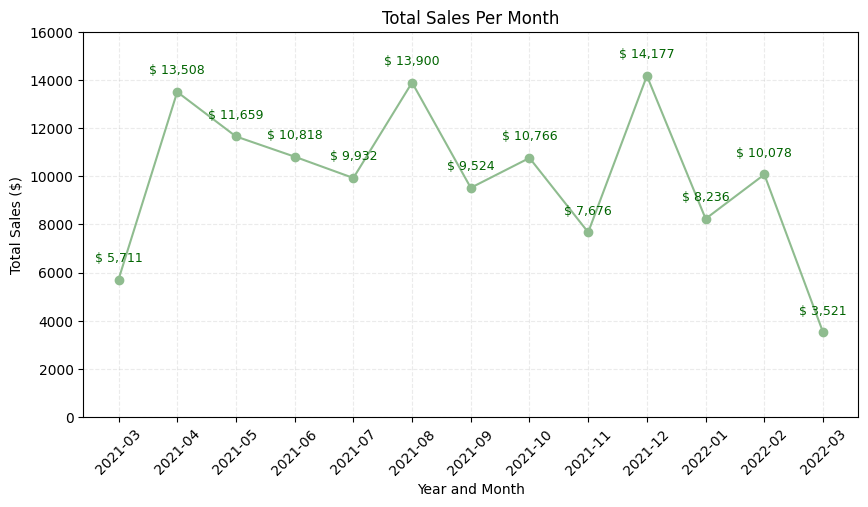

In [73]:
x = monthly_total_accepted_transactions["year_month"].astype(str)           # Necesito convertirlo a string para representarlo
y = monthly_total_accepted_transactions["amount"]

# Gráfico
plt.figure(figsize=(10, 5))
plt.plot(x, y, color="darkseagreen",  marker='o' )
plt.title("Total Sales Per Month")
plt.xlabel("Year and Month")
plt.ylabel("Total Sales ($)")
plt.xticks(rotation=45)
plt.ylim(0, 16000)
plt.grid(True, linestyle='--', alpha=0.25)

# Etiquetas de valores
for i, v in enumerate(y):
    plt.text(x[i], v + 750, f"$ {v:,.0f}", ha='center', fontsize=9, color='darkgreen')

# Mostrar
plt.show()

---

#### **Ejercicio 2**

Dues variables numèriques.

In [158]:
"""
Transacciones vs productos vendidos en cada transacción.
Tengo que unir las 3 tablas: transactions, trans_prod y products --> MERGE
"""

merged_data = dict_transactions['transactions'].merge(dict_transactions['trans_prod'], on="transaction_id", how="inner").merge(dict_transactions['products'], on="product_id", how="inner")

fig = go.Figure()

X= merged_data['amount']
Y= merged_data['price']

# Add the scatter trace
fig.add_trace(go.Scatter( 
    x= X,
    y= Y,
    mode='markers', 
    marker=dict(
        size=10, # Size
        color='darkseagreen', # Color
        opacity=0.8, # Point transparency 
        line=dict(width=1, color='black') # Properties of the edges
    ),
     text=[f"Total sale = $ {sale:.2f}, Product price = $ {price:.2f}" 
          for sale, price in zip(merged_data['amount'], merged_data['price'])]
))

fig.update_layout(
    title='Product price ($) vs. Total sales amount ($)', 
    xaxis_title='Sales amount by transaction ($)',
    yaxis_title='Product price ($)',
    width=800,
    height=600
)

fig.show()

# NO ME GUSTA ESTE GRÁFICO. PENSAR OTRAS OPCIONES. 

No hay relación entre el precio de los productos y el total de las transacciones en las que aparecen.

---

#### **Ejercicio 3**

Una variable categòrica.

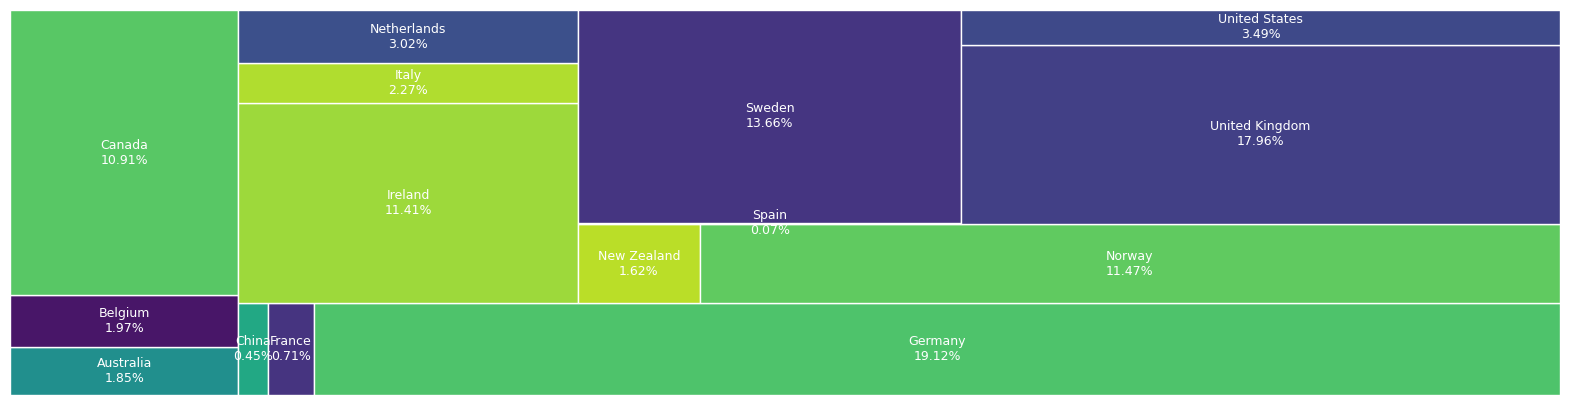

Total porcentaje: 100.00%


In [131]:
# Unir transactions con companies para obtener el país del vendedor
transactions_with_companies = dict_transactions['transactions'].merge(dict_transactions['companies'][['company_id', 'country']], on='company_id', how='left')

# Agrupo por país y sumo las ventas
country_sum_accepted_sales = transactions_with_companies.groupby('country')['amount'].sum().reset_index()
total_accepted_amount = country_sum_accepted_sales['amount'].sum()
percentage = [amount / total_accepted_amount * 100 for amount in country_sum_accepted_sales['amount']]     # list comprehension

S = country_sum_accepted_sales['amount']
L = country_sum_accepted_sales['country']

# create a figure
fig, ax = plt.subplots(figsize=(20,5))

# add treemap
squarify.plot(
   sizes=S,
   label= [f"{country}\n{pct:.2f}%" for country, pct in zip(L, percentage)],     # tengo que unir el nombre del país con su porcentaje
   ax=ax,
   ec= 'white',
   text_kwargs={'color': 'white', 'fontsize': 9}
)
plt.axis('off')

# display plot
plt.show()

print(f"Total porcentaje: {sum(percentage):.2f}%")

In [114]:
# Agrupo por país y sumo las ventas
transactions_with_companies = dict_transactions['transactions'].merge(dict_transactions['companies'][['company_id', 'country']], on='company_id', how='left')

country_sum_accepted_sales = transactions_with_companies.groupby('country')['amount'].sum().reset_index()
total_accepted_amount = country_sum_accepted_sales['amount'].sum()
country_sum_accepted_sales['percentage'] = country_sum_accepted_sales['amount'] / total_accepted_amount * 100

# Crear el treemap con plotly
fig2 = px.treemap(country_sum_accepted_sales, 
                 path=['country'], 
                 values='amount', 
                 title='Total sales by country',
                 labels={'amount': 'Total sales ($)'},
                 hover_data={'percentage': ':.2f%'})

# Mostrar el gráfico
fig2.show()

---

#### **Ejercicio 4**

Una variable categòrica i una numèrica.

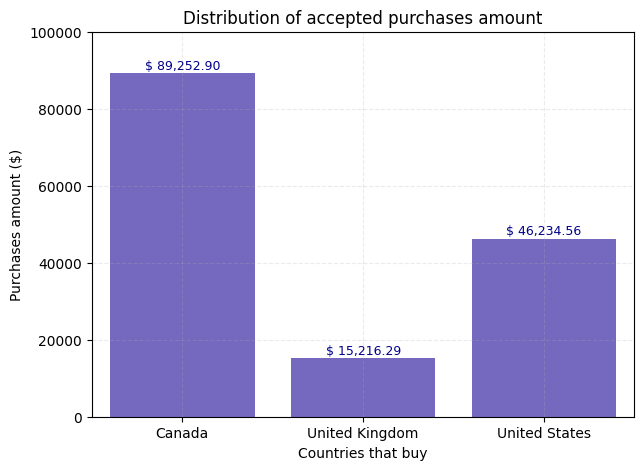

In [204]:
plt.figure(figsize=(7, 5))

# Unir transactions con data_users para obtener el país del comprador
transactions_with_users = dict_transactions['transactions'].merge(dict_transactions['data_users'][['user_id', 'country']], on='user_id', how='left')

# Agrupo por país y calculo la suma de las transacciones aceptadas
country_sum_accepted_transactions = transactions_with_users.groupby('country')['amount'].sum().reset_index()

X = country_sum_accepted_transactions['country']
Y = country_sum_accepted_transactions['amount']

# Compras por país
sns.barplot(x= X, y= Y, color="slateblue")
plt.title("Distribution of accepted purchases amount")
plt.xlabel("Countries that buy")
plt.ylabel("Purchases amount ($)")
plt.ylim(0, 100000)
plt.grid(True, linestyle='--', alpha=0.25)

# Etiquetas de valores
for i, v in enumerate(Y):
    plt.text(i, v + 1000, f"$ {v:,.2f}", ha='center', fontsize=9, color='darkblue')

plt.show()

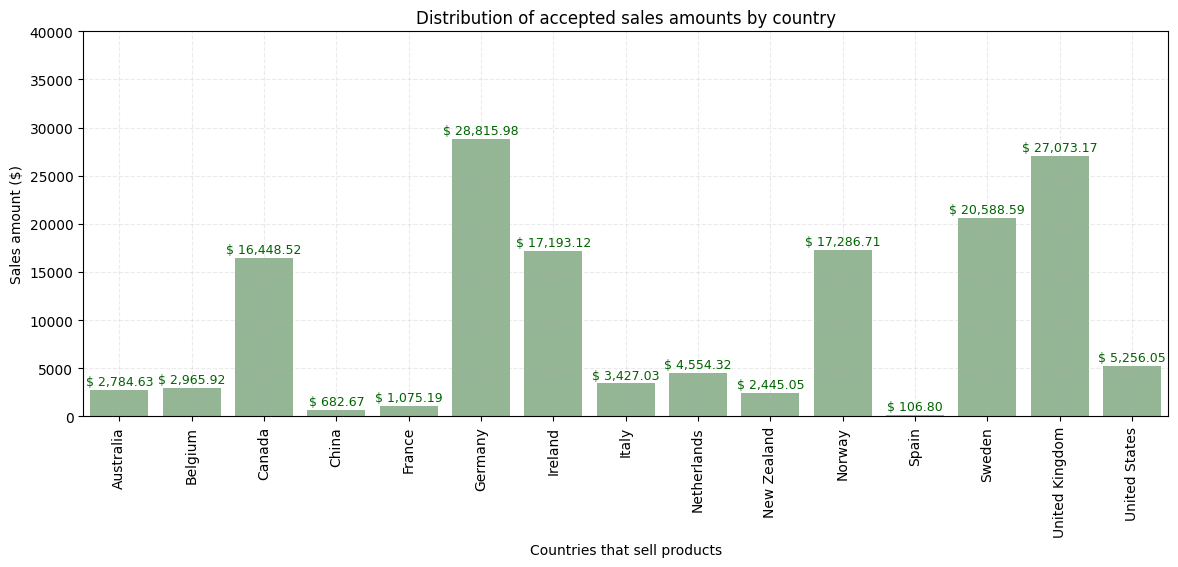

In [205]:
plt.figure(figsize=(14, 5))

# Unir transactions con companies para obtener el país del vendedor
transactions_with_companies = dict_transactions['transactions'].merge(dict_transactions['companies'][['company_id', 'country']], on='company_id', how='left')

# Agrupo por país y calculo la media de las transacciones aceptadas
country_sum_accepted_sales = transactions_with_companies.groupby('country')['amount'].sum().reset_index()

X = country_sum_accepted_sales['country']
Y = country_sum_accepted_sales['amount']

# Ventas por país
sns.barplot(x= X, y= Y, color="darkseagreen")
plt.title("Distribution of accepted sales amounts by country")
plt.xlabel("Countries that sell products")
plt.ylabel("Sales amount ($)")
plt.xticks(rotation=90)
plt.ylim(0, 40000)
plt.grid(True, linestyle='--', alpha=0.25)

# Etiquetas de valores
for i, v in enumerate(Y):
    plt.text(i, v + 500, f"$ {v:,.2f}", ha='center', fontsize=9, color='darkgreen')

plt.show()

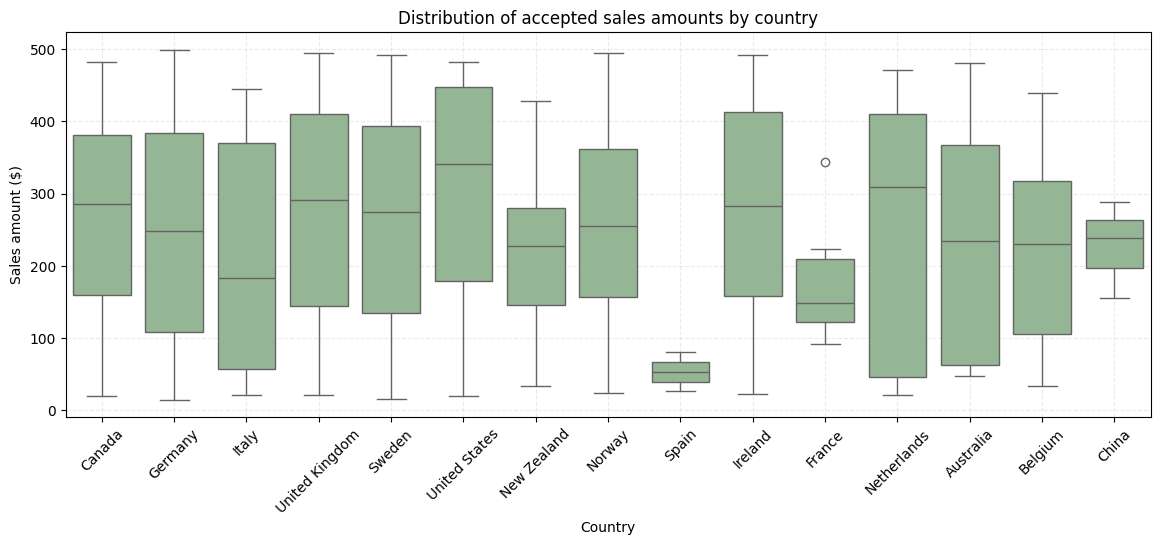

In [ ]:
# Unir transactions con companies para obtener el país del vendedor
transactions_with_companies = dict_transactions['transactions'].merge(dict_transactions['companies'][['company_id', 'country']], on='company_id', how='left')

plt.figure(figsize=(14, 5))
sns.boxplot(x='country', y='amount', data=transactions_with_companies, color='darkseagreen')
plt.xticks(rotation=45)
plt.title("Distribution of accepted sales amounts by country")
plt.xlabel("Country")
plt.ylabel("Sales amount ($)")
plt.grid(True, linestyle='--', alpha=0.25)

plt.show()

---

#### **Ejercicio 5**

Dues variables categòriques.

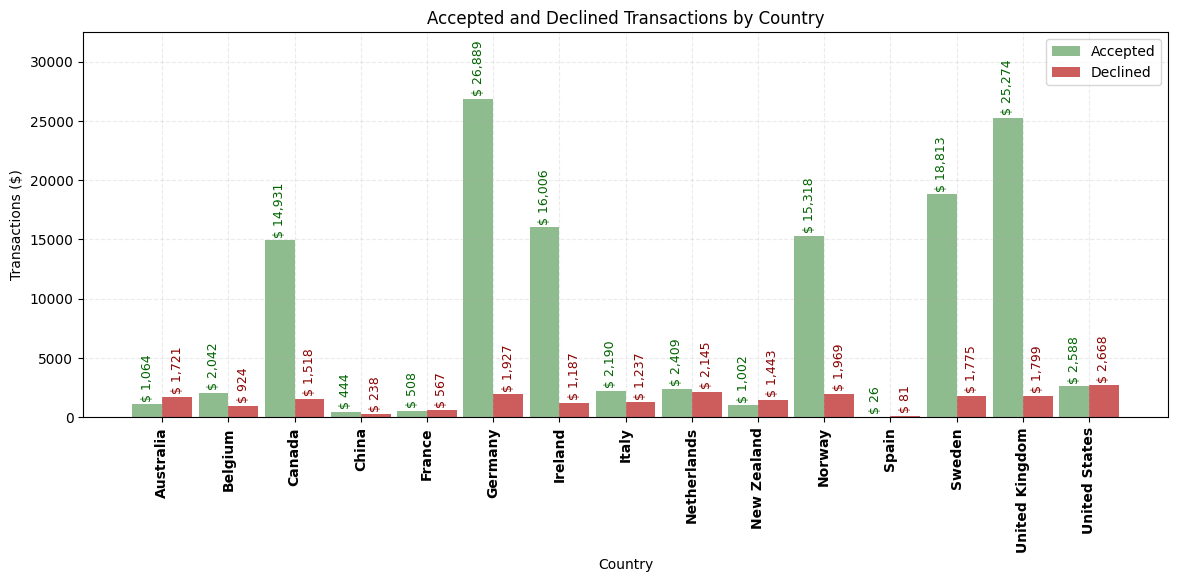

In [207]:
# Unir las transacciones aceptadas y rechazadas por país
transactions_with_companies = dict_transactions['transactions'].merge(dict_transactions['companies'][['company_id', 'country']], on='company_id', how='left')

# Agrupar por país y calcular las transacciones aceptadas y rechazadas
accepted_transactions_by_country = transactions_with_companies[transactions_with_companies['declined'] == 0].groupby('country')['amount'].sum()
declined_transactions_by_country = transactions_with_companies[transactions_with_companies['declined'] == 1].groupby('country')['amount'].sum()

# Crear un DataFrame con las transacciones aceptadas y rechazadas por país
transactions_by_country = pd.DataFrame({
	'amount_accepted': accepted_transactions_by_country,
	'amount_declined': declined_transactions_by_country})

# Crear eje X
x_labels = transactions_by_country.index
x = np.arange(len(x_labels))  # Posiciones en el eje X

# Configurar tamaño de figura
plt.figure(figsize=(14, 5))

# Crear barras con desplazamiento
bar_width = 0.45  # Espaciado entre barras
plt.bar(x - bar_width/2, transactions_by_country['amount_accepted'], width=bar_width, color='darkseagreen', label='Accepted')
plt.bar(x + bar_width/2, transactions_by_country['amount_declined'], width=bar_width, color='indianred', label='Declined')

# Ajustar etiquetas del eje X
plt.xticks(ticks=x, labels=x_labels, rotation=90, ha='center', fontweight='bold')

# Agregar etiquetas y título
plt.xlabel("Country")
plt.ylabel("Transactions ($)")
plt.title("Accepted and Declined Transactions by Country")
plt.ylim(0, 32500)
plt.grid(True, linestyle='--', alpha=0.25)
plt.legend()

# Agregar etiquetas de valores en las barras. Tengo que hacerlo para cada serie
for i, v in enumerate(transactions_by_country['amount_accepted']):
    plt.text(x[i] - bar_width/2, v + 500, f"$ {v:,.0f}", ha='center', fontsize=9, color='darkgreen', rotation=90)

for i, v in enumerate(transactions_by_country['amount_declined']):
    plt.text(x[i] + bar_width/2, v + 500, f"$ {v:,.0f}", ha='center', fontsize=9, color='darkred', rotation=90)

# Mostrar gráfico
plt.show()

In [ ]:
import plotly.express as px

# Unir transactions con data_users para obtener país y ciudad del comprador
transactions_with_users = dict_transactions['transactions'].merge(dict_transactions['data_users'][['user_id', 'country', 'city']], on='user_id', how='left')

# Agrupar por país y ciudad sumando el monto de compras
grouped_data = transactions_with_users.groupby(['country', 'city'], as_index=False)['amount'].sum()

# Crear el gráfico Treemap
fig = px.treemap(
    grouped_data, 
    path=['country', 'city'],  # Jerarquía de datos
    values='amount',  # Tamaño basado en el monto de compras
    color='amount',  # Colorear por monto de compras
    hover_data=['amount'],  # Mostrar información adicional al pasar el cursor
    color_continuous_scale='Viridis'  # Esquema de colores
)

# Mostrar
fig.show()

In [151]:
fig = px.sunburst(
    grouped_data, 
    path=['country', 'city'],  
    values='amount',  
    color='amount',  
    hover_data=['amount'],  
    color_continuous_scale='Blues'  
)

fig.show()


---

#### **Ejercicio 6**

Tres variables.

In [ ]:
"""país, año y ventas"""

# Unir transactions con data_users para obtener el país del vendedor
transactions_with_companies = dict_transactions['transactions'].merge(dict_transactions['companies'][['company_id', 'country']], on='company_id', how='left')

# Agrupo por país, año y calculo la suma de las transacciones aceptadas
country_year_sum_accepted_transactions = transactions_with_companies.groupby(['country', 'year'], as_index=False)['amount'].sum()

print(country_year_sum_accepted_transactions.head())

map = px.scatter_geo(country_year_sum_accepted_transactions,
                     locations= 'country',
                     size='amount',
                     size_max=50,
                     animation_frame='year',
                     projection="natural earth",
                     hover_name='country', 
                     hover_data={'amount':':,.2f'})

map.show()

     country  year    amount
0  Australia  2021   2138.45
1  Australia  2022    646.18
2    Belgium  2021   2308.85
3    Belgium  2022    657.07
4     Canada  2021  14711.03


In [200]:
"""país, año y ventas"""

# Unir transactions con data_users para obtener el país del vendedor
transactions_with_companies = dict_transactions['transactions'].merge(dict_transactions['companies'][['company_id', 'country']], on='company_id', how='left')

# Agrupo por país, año y calculo la suma de las transacciones aceptadas
country_year_sum_accepted_transactions = transactions_with_companies.groupby(['country', 'lat', 'longitude', 'year'], as_index=False)['amount'].sum()

print(country_year_sum_accepted_transactions.head())

map = px.scatter_geo(country_year_sum_accepted_transactions,
                     lat= 'lat',
                     lon= 'longitude',
                     size='amount',
                     size_max=5,
                     animation_frame='year',
                     projection="natural earth",
                     hover_name='country', 
                     hover_data={'amount':':,.2f'})

map.show()

     country      lat  longitude  year  amount
0  Australia -47.3147   135.2380  2021  412.48
1  Australia -44.0412   101.3340  2021   47.15
2  Australia -41.8894    24.6466  2021  359.70
3  Australia -21.8805  -112.5880  2021  480.13
4  Australia  22.4650   -95.0771  2022  155.57


In [ ]:
map2 = px.choropleth(country_year_sum_accepted_transactions,
                     color="amount",
                     locations="country",
                     hover_name="country",
                     height=600 )
map2.show()

# No entiendo por qué no salen las burbujas en el mapa. ¿Puede ser que plotly no reconozca los nombres de los países?

---

#### **Ejercicio 7**

Graficar un Pairplot.

***
***

### **Nivel 2**

#### **Ejercicio 1**

Correlació de totes les variables numèriques.

             amount  declined   user_id       lat  longitude      year  \
amount     1.000000 -0.037882 -0.035354  0.078116   0.043439 -0.088487   
declined  -0.037882  1.000000  0.414293  0.010402  -0.002523 -0.037207   
user_id   -0.035354  0.414293  1.000000 -0.004486   0.017145  0.027736   
lat        0.078116  0.010402 -0.004486  1.000000  -0.006894 -0.024211   
longitude  0.043439 -0.002523  0.017145 -0.006894   1.000000 -0.048819   
year      -0.088487 -0.037207  0.027736 -0.024211  -0.048819  1.000000   
month      0.054914 -0.038702 -0.091357  0.013557   0.021973 -0.655303   
day        0.051248  0.011546 -0.030009  0.025323  -0.009681 -0.129569   

              month       day  
amount     0.054914  0.051248  
declined  -0.038702  0.011546  
user_id   -0.091357 -0.030009  
lat        0.013557  0.025323  
longitude  0.021973 -0.009681  
year      -0.655303 -0.129569  
month      1.000000  0.015286  
day        0.015286  1.000000  


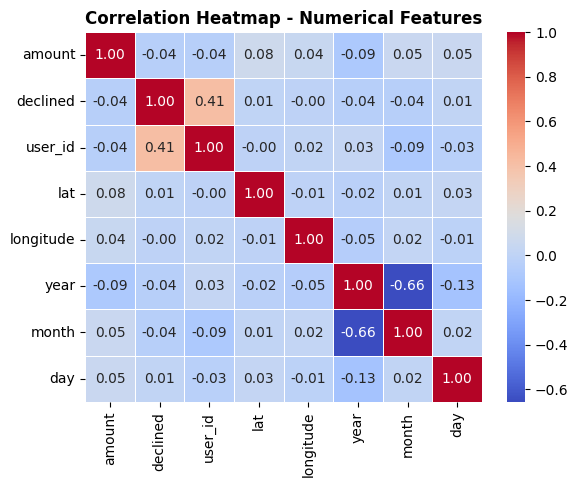

In [66]:
numerical_cols = dict_transactions['transactions'].select_dtypes(include=['float64', 'int64'])

correlation = numerical_cols.corr()
print(correlation)

sns.heatmap(correlation, cmap="coolwarm", annot=True, fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap - Numerical Features", fontweight="bold")

plt.show()

---

#### **Ejercicio 2**

Implementa un jointplot.

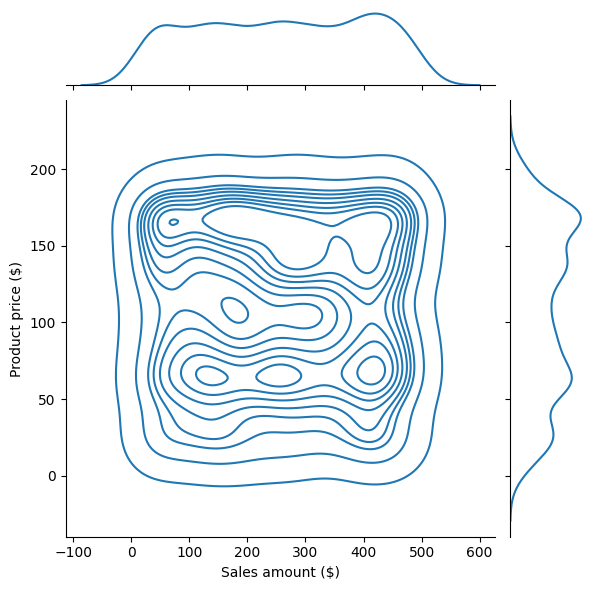

In [212]:
# Unir transacciones con productos
merged_data = transactions_with_companies.merge(dict_transactions['trans_prod'], on="transaction_id", how="inner").merge(dict_transactions['products'][['product_id', 'price']], on="product_id", how="inner")

sns.jointplot(x='amount', y='price', data=merged_data, kind='kde')
plt.xlabel("Sales amount ($)")
plt.ylabel("Product price ($)")
plt.show()


---
---

### **Nivel 3**

#### **Ejercicio 1**

Implementa un violinplot combinat amb un altre tipus de gràfic.

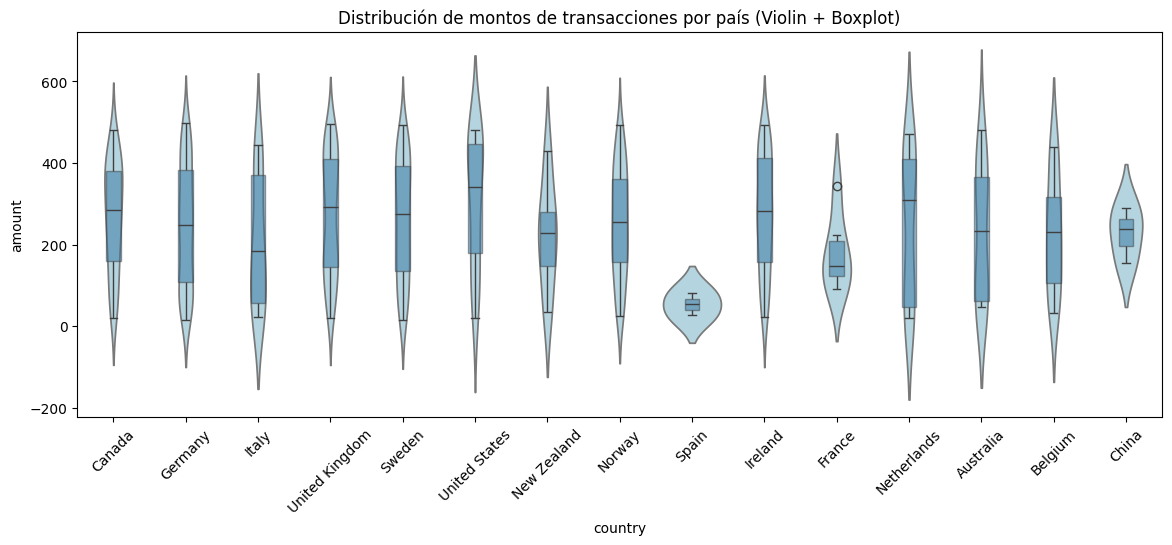

In [203]:
plt.figure(figsize=(14, 5))
sns.violinplot(x='country', y='amount', data=transactions_with_companies, inner=None, color="lightblue")
sns.boxplot(x='country', y='amount', data=transactions_with_companies, width=0.2, boxprops=dict(alpha=0.5))
plt.xticks(rotation=45)
plt.title("Distribución de montos de transacciones por país (Violin + Boxplot)")
plt.show()


# Ver otras opciones

---

#### **Ejercicio 2**

Genera un FacetGrid per a visualitzar múltiples aspectes de les dades simultàniament.

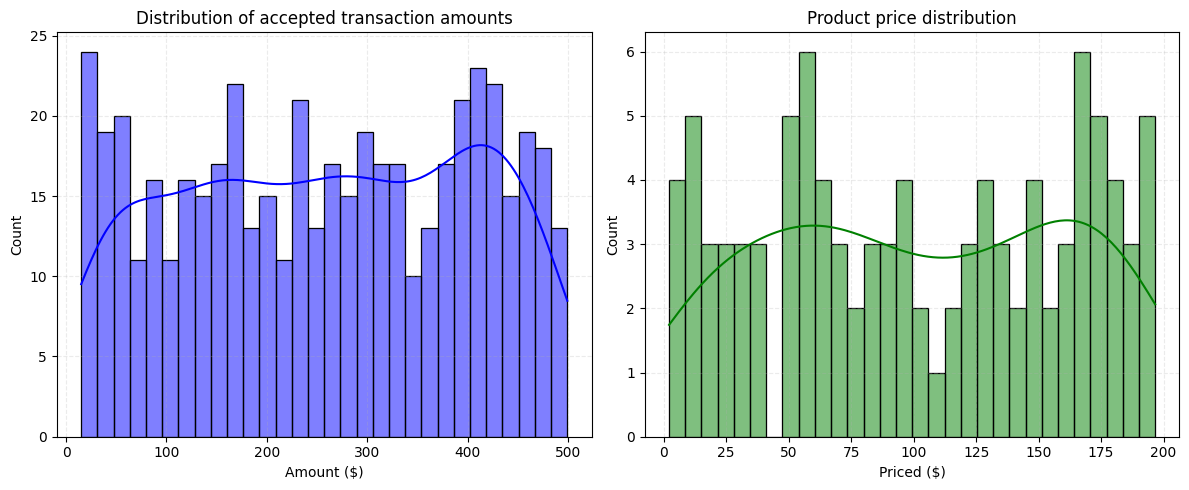

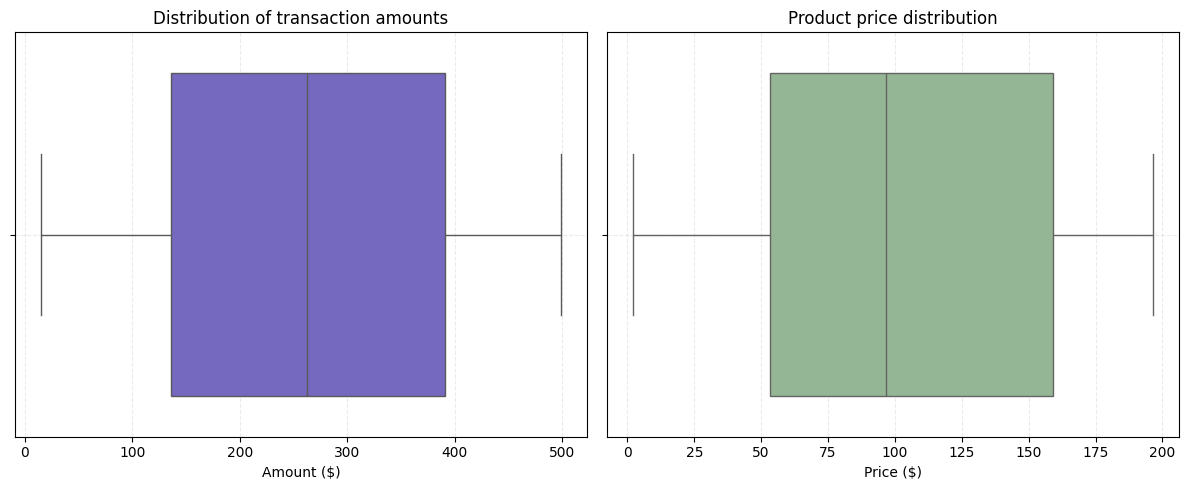

In [213]:
import seaborn as sns

plt.figure(figsize=(12, 5))

# Histograma de amount
plt.subplot(1, 2, 1)        # Dos gráficos al mismo nivel (uno al lado del otro), el de la izquierda
sns.histplot(accepted_transactions['amount'], bins=30, kde=True, color="blue")
plt.title("Distribution of accepted transaction amounts")
plt.xlabel("Amount ($)")
plt.ylabel("Count")
plt.grid(True, linestyle='--', alpha=0.25)

# Histograma de price
plt.subplot(1, 2, 2)        # Dos gráficos al mismo nivel (uno al lado del otro), el de la derecha
sns.histplot(dict_transactions['products']['price'], bins=30, kde=True, color="green")
plt.title("Product price distribution")
plt.xlabel("Priced ($)")
plt.ylabel("Count")
plt.grid(True, linestyle='--', alpha=0.25)

plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 5))

# Boxplot de amount
plt.subplot(1, 2, 1)
sns.boxplot(x=accepted_transactions['amount'], color="slateblue")
plt.title("Distribution of transaction amounts")
plt.xlabel("Amount ($)")
plt.grid(True, linestyle='--', alpha=0.25)

# Boxplot de price
plt.subplot(1, 2, 2)
sns.boxplot(x=dict_transactions['products']['price'], color="darkseagreen")
plt.title("Product price distribution")
plt.xlabel("Price ($)")
plt.grid(True, linestyle='--', alpha=0.25)

plt.tight_layout()
plt.show()


In [ ]:
# create a color palette
from pypalettes import load_cmap
cmap = load_cmap('CafeTerrace')
category_codes, unique_categories = pd.factorize(df['parent'])
colors = [cmap(code / (len(unique_categories) - 1)) for code in category_codes]
